In [25]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import sys

import gplearn.genetic as gen
import pydotplus
from IPython.display import Image

from scipy.interpolate import interp2d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge

%matplotlib inline

install `pydotplus` and `gplearn` with `pip`, and `graphviz` package

In [2]:
#Loading data
A = scio.loadmat("tesis_cami/A.mat")["A"]
b = scio.loadmat("tesis_cami/b.mat")["b"]
XDOM = scio.loadmat("tesis_cami/XDOM.mat")["XDOM"]
YDOM = scio.loadmat("tesis_cami/YDOM.mat")["YDOM"]
ZDOM = scio.loadmat("tesis_cami/ZDOM.mat")["ZDOM"]
u = scio.loadmat("tesis_cami/u.mat")["u"]
time = scio.loadmat("tesis_cami/tiempo.mat")["tiempo"]
Su = scio.loadmat("tesis_cami/Su.mat")["Su"]
XDO = scio.loadmat("tesis_cami/XDO.mat")["XDO"]
YDO = scio.loadmat("tesis_cami/YDO.mat")["YDO"]
ZSOL = scio.loadmat("tesis_cami/ZSOL.mat")["ZSOL"]

In [3]:
#Splitting data in different sensors
sensors = ["Arica","Iquique", "Patache", "Mejillones", "DART"]
A_arica,b_arica = A[:961],b[:961]
A_iquique,b_iquique = A[961:961*2],b[961:961*2]
A_patache,b_patache = A[961*2:961*3],b[961*2:961*3]
A_mejillones,b_mejillones = A[961*3:961*4],b[961*3:961*4]
A_dart,b_dart = A[961*4:],b[961*4:]

As = [A_arica,A_iquique,A_patache,A_mejillones,A_dart]
bs = [b_arica,b_iquique,b_patache,b_mejillones,b_dart]

#Time when data comes to the sensor
time_offset = np.array([100,80,100,100,50])
inversion_time = 30

In [4]:
#Stacking all sensor data
AA = []
bb = []

AA_test = []
bb_test = []
for A_i,b_i,title,toffset in zip(As,bs,sensors,time_offset):
    
    #Getting inversion time
    start = toffset
    end = inversion_time*4
    #Separating train with test
    AA.append(A_i[start:end])
    bb.append(b_i[start:end])

    AA_test.append(A_i[end:])
    bb_test.append(b_i[end:])

#Stacking all sensor data
AA = np.vstack(AA)
bb = np.vstack(bb)

In [51]:
reg = gen.SymbolicRegressor(population_size=1000,
                           generations=100, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           function_set=('add', 'sub', 'mul', 'div'),
                           parsimony_coefficient=0.01, random_state=0)

In [52]:
reg.fit(AA,bb)

/home/tronco/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    26.24 2024.8909967778425        3 0.3505758673299509 0.27363831029735974     51.49s
   1     3.21 0.5004140937882038        5 0.27929636622964554 0.3187802517189072      1.22m
   2      3.2 0.4557478636997256        7 0.24426913800073594 0.5287355972857842      1.27m
   3     4.13 0.650799125820358        7 0.22105015634858916 0.41979839008960074      1.41m
   4      5.0 2.4383748784457375        5 0.2122757984924173 0.5210466580354758      1.55m
   5     4.48 0.5325888968673083        7 0.2041727553449722 0.40523813258050023      1.65m
   6     4.18 0.37309407481238754        5 0.21547262379517856 0.4922752303106241      1.66m
   7     4.22 0.43441768819236437        7 0.2139752490478212 0.31701568925485935      1.68m
   8     4.63 0.44

  87     5.13 0.4535537297957848        7 0.2062942136419676 0.3861450079075417     19.65s
  88     5.13 0.753735270134383        5 0.21109842213421096 0.5221903116096168     18.02s
  89      4.9 0.37847210938209436        5 0.21027404520331636 0.5296097039876679     16.38s
  90     4.96 0.8204008734389682        7 0.20190983731734796 0.42560439482911844     14.74s
  91     4.87 0.5016958496497489        5 0.20626685330543673 0.5656744310685841     13.09s
  92     4.99 0.33997483109640897        7 0.20069087640349628 0.4365750430537834     11.45s
  93     5.01 0.6198964460326813        7 0.201704524206102 0.4274522128303319      9.80s
  94     5.08 0.43362797268583836        7 0.2111563980504721 0.3423853482310011      8.18s
  95     4.99 1.074634753289152        5 0.20165518146157926 0.6071794776633016      6.55s
  96     4.99 0.5808910925469217        7 0.20646203416516756 0.3846346231987421      4.91s
  97     4.99 0.3641911302815255        5 0.20585692596853108 0.5693637771007353  

SymbolicRegressor(const_range=(-1.0, 1.0),
         function_set=('add', 'sub', 'mul', 'div'), generations=100,
         init_depth=(2, 6), init_method='half and half', max_samples=0.9,
         metric='mean absolute error', n_jobs=1, p_crossover=0.7,
         p_hoist_mutation=0.05, p_point_mutation=0.1, p_point_replace=0.05,
         p_subtree_mutation=0.1, parsimony_coefficient=0.01,
         population_size=1000, random_state=0, stopping_criteria=0.01,
         tournament_size=20, verbose=1, warm_start=False)

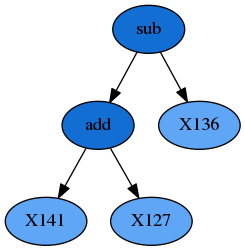

In [53]:
graph = pydotplus.graphviz.graph_from_dot_data(reg._program.export_graphviz())
Image(graph.create_png())

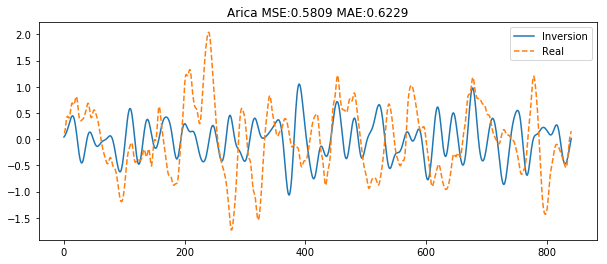

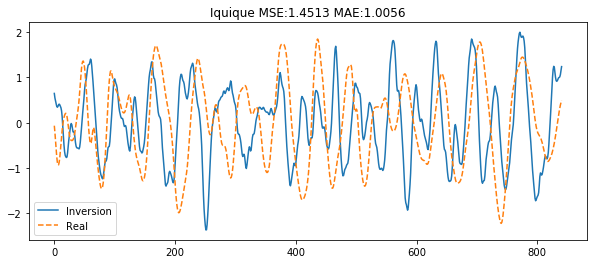

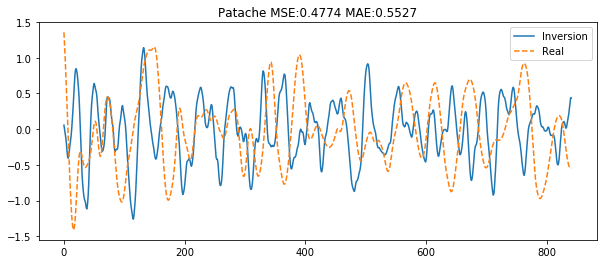

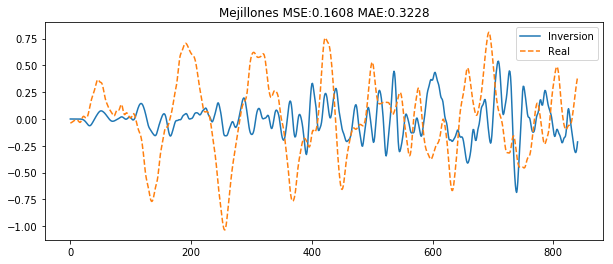

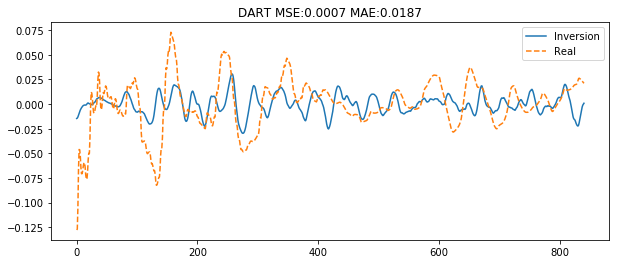

In [54]:
#Plotting solutions with rigde regression
for A_test_i, b_test_i,title in zip(AA_test,bb_test,sensors):
    b_pred = reg.predict(A_test_i)
    MSE = round(metrics.mean_squared_error(b_test_i,b_pred),4)
    MAE = round(metrics.mean_absolute_error(b_test_i,b_pred),4)

    plt.figure(figsize=(10,4))
    plt.title("{} MSE:{} MAE:{}".format(title,MSE, MAE))
    plt.plot(b_pred,label="Inversion")
    plt.plot(b_test_i[:,0],"--",label="Real")
    plt.legend()
    plt.show()